In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('listings 2.csv')
columns_to_drop = [ 'listing_url', 'scrape_id', 'last_scraped', 'source', 'description', 'picture_url','host_id','host_url',
                   'host_thumbnail_url','host_picture_url','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights'
                   ,'name','neighborhood_overview','host_response_time','neighbourhood_group_cleansed','minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm','host_is_superhost']
df = df.drop(columns=columns_to_drop, errors='ignore')
df['price_num'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

df['taken_30'] = 30-df['availability_30']
df['taken_60'] = 60-df['availability_60']

df['sales_30'] = df['taken_30'] * df['price_num']
df['sales_60'] = df['taken_60'] * df['price_num']

# Column types
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float) / 100

specific_date = pd.to_datetime('2024-04-04')
df['host_days_since'] = (specific_date - df['host_since']).dt.days
df['host_desc_len'] = [0 if pd.isna(i) else len(i) for i in df['host_about']]
pd.set_option('display.max_columns', None)
neighbourhood_mapping = {
    "Union Station, Stanton Park, Kingman Park": "Union Station",
    "Capitol Hill, Lincoln Park": "Capitol Hill",
    "Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View": "Columbia Heights",
    "Edgewood, Bloomingdale, Truxton Circle, Eckington": "Edgewood",
    "Dupont Circle, Connecticut Avenue/K Street": "Dupont Circle",
    "Shaw, Logan Circle": "Shaw",
    "Brightwood Park, Crestwood, Petworth": "Brightwood Park",
    "Ivy City, Arboretum, Trinidad, Carver Langston": "Ivy City",
    "Howard University, Le Droit Park, Cardozo/Shaw": "Howard University",
    "Kalorama Heights, Adams Morgan, Lanier Heights": "Kalorama Heights"
}

# Replace the 'neighbourhood_cleansed' in the DataFrame using the mapping
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace(neighbourhood_mapping)



,id,host_name,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,taken_30,taken_60,sales_30,sales_60,host_days_since,host_desc_len
0,3686,Vita,2008-11-26,"Washington D.C., DC","I am a literary scholar, teacher, poet, vegan ...",NaN,1.00,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,38.86339,-76.98889,Private room in home,Private room,1,NaN,1 private bath,NaN,1.0,[],$67.00,31,365,NaN,t,30,60,90,365,2023-12-18,84,3,0,2010-11-01,2023-08-30,4.64,4.73,4.45,4.91,4.84,3.91,4.64,NaN,f,1,0,1,0,0.53,67.0,0,0,0.0,0.0,5608,1028
1,3943,Vasa,2008-12-12,"Washington, DC",I travel often and always try to immerse mysel...,100%,0.97,Eckington,5,5,"['email', 'phone']",t,t,"Washington, District of Columbia, United States",Edgewood,38.91195,-77.00456,Private room in townhouse,Private room,2,NaN,1 private bath,NaN,1.0,[],$66.00,1,1125,NaN,t,8,11,11,252,2023-12-18,495,46,2,2009-05-10,2023-11-22,4.83,4.88,4.92,4.94,4.91,4.57,4.75,Hosted License: 5007242201001033,f,5,0,5,0,2.78,66.0,22,49,1452.0,3234.0,5592,445
2,4197,Sandra,2008-12-12,"Washington D.C., DC",I’m a California native who came to work for t...,100%,1.00,Capitol Hill,2,2,"['email', 'phone']",t,t,"Washington, District of Columbia, United States",Capitol Hill,38.88719,-76.99472,Private room in home,Private room,1,NaN,1.5 shared baths,NaN,1.0,[],$135.00,7,1125,NaN,t,6,21,51,321,2023-12-18,58,6,0,2009-05-14,2023-11-11,4.85,4.98,4.87,5.00,4.98,4.96,4.95,Hosted License: 5007242201000749,f,2,0,2,0,0.33,135.0,24,39,3240.0,5265.0,5592,239
3,4529,Bertina,2008-12-30,"Washington, DC",I am a retried teacher. I enjoy walking and wa...,NaN,NaN,Eastland Gardens,4,4,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",38.90585,-76.94469,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.0,[],$56.00,30,1125,NaN,t,29,59,89,179,2023-12-18,102,0,0,2009-08-08,2019-07-05,4.66,4.80,4.60,4.93,4.93,4.51,4.83,Exempt,f,2,0,2,0,0.58,56.0,1,1,56.0,56.0,5574,62
4,4967,Edward,2009-01-26,NaN,"I am fun, honest and very easy going and trave...",NaN,0.85,Ivy City,3,6,"['email', 'phone']",t,t,NaN,Ivy City,38.91217,-76.99249,Private room in home,Private room,1,NaN,3 baths,NaN,1.0,[],"$2,500.00",1125,1125,NaN,t,30,60,90,365,2023-12-18,30,0,0,2010-11-04,2016-09-22,4.74,4.68,4.89,4.93,4.93,4.21,4.64,NaN,f,3,0,3,0,0.19,2500.0,0,0,0.0,0.0,5547,172


C:\Users\57596\AppData\Local\Temp\ipykernel_11580\4094926871.py:106: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])


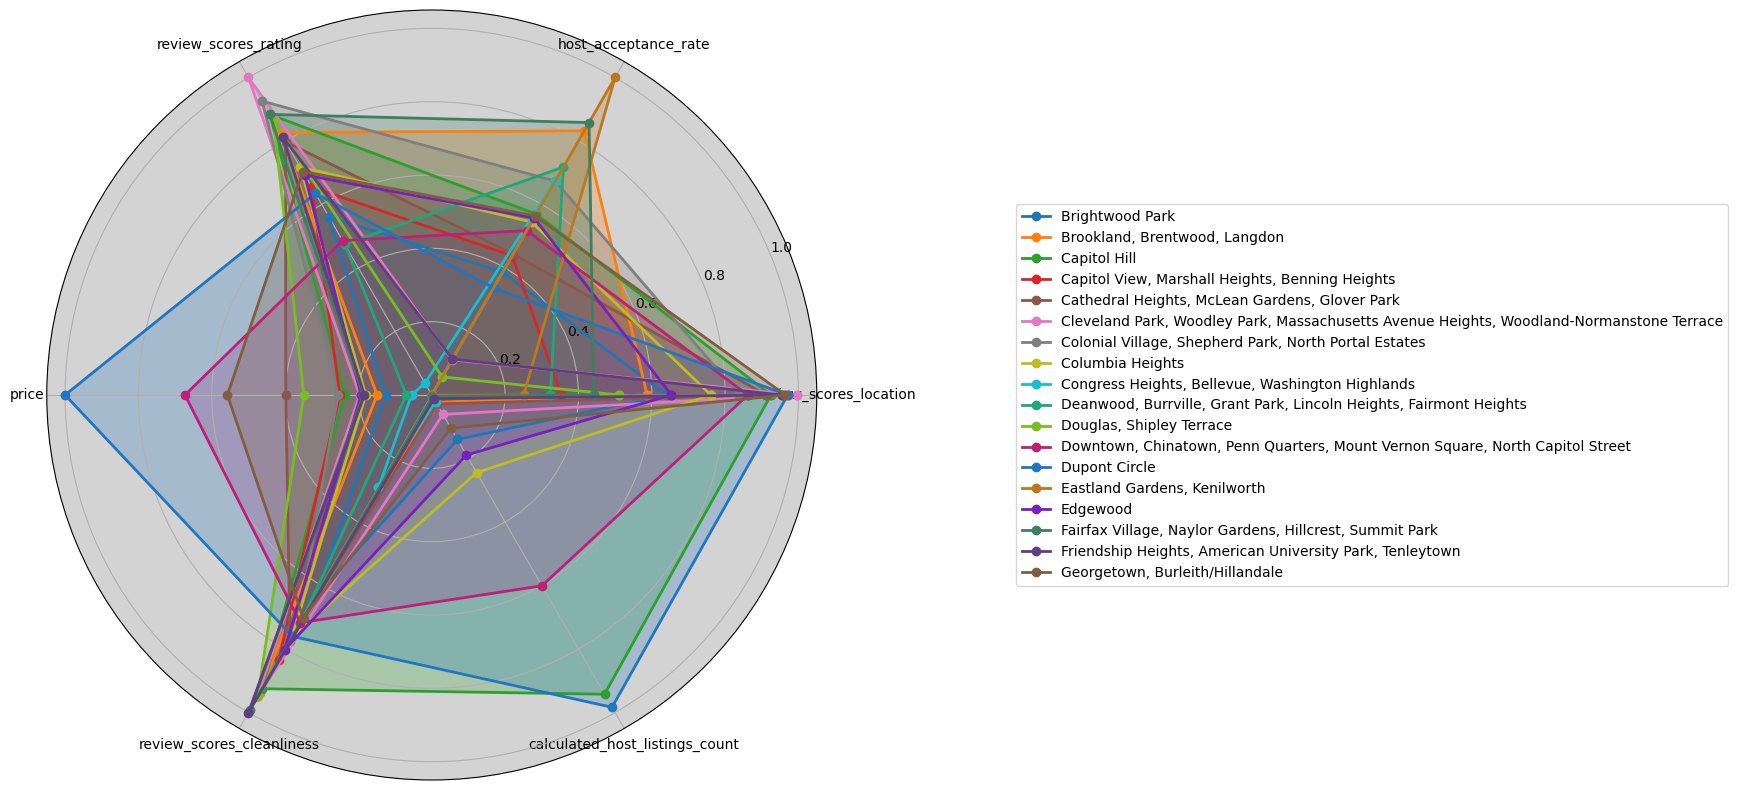

Dropdown(description='Neighborhood:', options=('All', 'Brightwood Park', 'Brookland, Brentwood, Langdon', 'Cap…

In [10]:

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from functools import lru_cache
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties


neighborhood_colors = {
    'Brightwood Park': '#1f77b4',  # Blue
    'Brookland, Brentwood, Langdon': '#ff7f0e',  # Orange
    'Capitol Hill': '#2ca02c',  # Green
    'Capitol View, Marshall Heights, Benning Heights': '#d62728',  # Red
    'Columbia Heights': '#9467bd',  # Purple
    'Cathedral Heights, McLean Gardens, Glover Park': '#8c564b',  # Brown
    'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace': '#e377c2',  # Pink
    'Colonial Village, Shepherd Park, North Portal Estates': '#7f7f7f',  # Gray
    'Columbia Heights': '#bcbd22',  # Olive
    'Congress Heights, Bellevue, Washington Highlands': '#17becf',  # Cyan
    'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights': '#1fa77b',  # Some other color
    'Douglas, Shipley Terrace': '#77bf1f',  # Another color
    'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street': '#bf1f77',  # Yet another color
    'Dupont Circle': '#1f77bf',  # Yet another color
    'Eastland Gardens, Kenilworth': '#bf771f',  # Yet another color
    'Edgewood': '#771fbf',  # Yet another color
    'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park': '#3f7f5f',  # Dark Green
    'Friendship Heights, American University Park, Tenleytown': '#5f3f7f',  # Dark Purple
    'Georgetown, Burleith/Hillandale': '#7f5f3f',  # Dark Brown
}
agg_functions = {
    'review_scores_location': 'mean',
    'host_acceptance_rate': 'mean',
    'review_scores_rating': 'mean',
    'price': 'mean',
    'review_scores_cleanliness': 'mean',
    'calculated_host_listings_count': 'sum'
}
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[%,]', '', regex=True).astype(float)
grouped_df = df.groupby('neighbourhood_cleansed').agg(agg_functions)
normalized_df = (grouped_df - grouped_df.min()) / (grouped_df.max() - grouped_df.min())


font = FontProperties()
font.set_size(10)
font.set_weight('bold')

# Calculate angles for radar chart axes
num_vars = len(agg_functions)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Cache function to get data for each neighborhood
@lru_cache(maxsize=128)
def get_neighborhood_data(neighborhood):
    values = normalized_df.loc[neighborhood].tolist()
    values += values[:1]  # Repeat the first value at the end for a closed plot
    return values



def plot_neighborhood(neighborhood):
    # Close previous figures
    plt.close('all')
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_facecolor('lightgray')
    
    values = get_neighborhood_data(neighborhood)
    color = neighborhood_colors.get(neighborhood, '#333333')
    
    ax.plot(angles, values, 'o-', linewidth=2, color=color)
    ax.fill(angles, values, alpha=0.25, color=color)
    
    ax.set_thetagrids(np.degrees(angles[:-1]), labels=agg_functions.keys())
    
    ax.set_title(f'Radar Chart for {neighborhood}', fontproperties=font)
    plt.tight_layout()
    plt.show()



# Function to plot a single neighborhood
def plot_all_neighborhoods():
    # Close previous figures
    plt.close('all')

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_facecolor('lightgray')  # Change the background color of the plot

    for neighborhood in normalized_df.index:
        if neighborhood in neighborhood_colors:
            values = get_neighborhood_data(neighborhood)
            color = neighborhood_colors[neighborhood]
            ax.plot(angles, values, 'o-', linewidth=2, color=color, label=neighborhood)
            ax.fill(angles, values, alpha=0.25, color=color)

    # Set the labels for each axis
    ax.set_thetagrids(np.degrees(angles[:-1]), labels=agg_functions.keys())

    # Set up the legend on the right
    ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))

    # Adjust layout to fit the legend
    plt.tight_layout(rect=[0, 0, 0.75, 1])

    plt.show()




# Dropdown widget for selecting neighborhoods
dropdown_neighborhoods = widgets.Dropdown(
    options=['All'] + sorted(normalized_df.index),  # Sorted list + option for all
    value='All',
    description='Neighborhood:',
    disabled=False,
)

# Function to handle dropdown changes
from IPython.display import clear_output


def on_dropdown_change(change):
    clear_output(wait=True)  # Clear the output below this cell and wait for the new output
    if change['new'] == 'All':
        plot_all_neighborhoods()
    else:
        plot_neighborhood(change['new'])
    display(dropdown_neighborhoods)  # Redisplay the dropdown after clearing output

# Initial call to display the dropdown
display(dropdown_neighborhoods)

# Observe dropdown changes and link to handler function
dropdown_neighborhoods.observe(on_dropdown_change, names='value')


C:\Users\57596\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\57596\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\57596\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

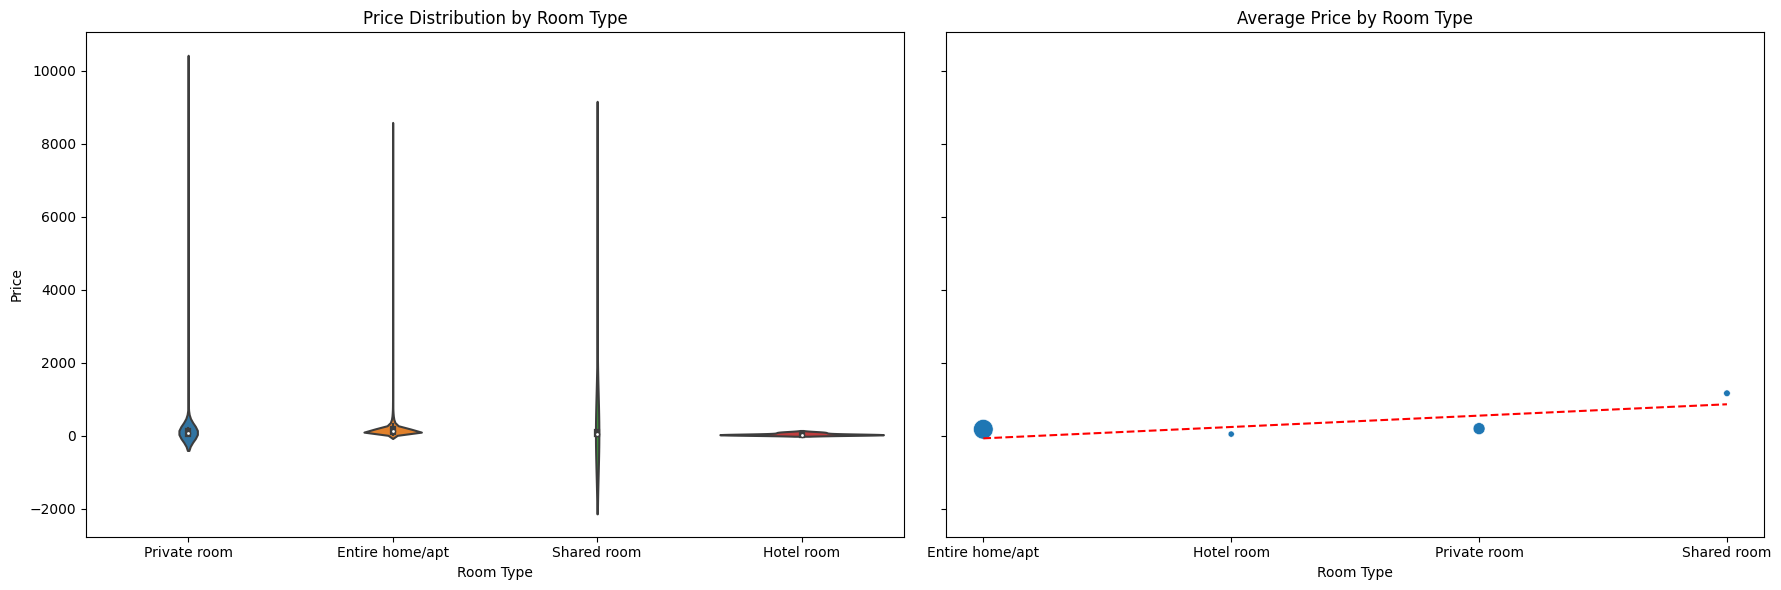

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
df['price'] = df['price'].replace('[\$\,]', '', regex=True).astype(float)

# Create a violin plot on the left side of the figure
sns.violinplot(x='room_type', y='price', data=df, ax=axes[0])
axes[0].set_title('Price Distribution by Room Type')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Price')

# Create a scatter plot on the right side of the figure
average_prices = df.groupby('room_type')['price'].mean().reset_index()
count_listings = df.groupby('room_type')['price'].size().reset_index(name='count')

scatter_data = pd.merge(average_prices, count_listings, on='room_type')

sns.scatterplot(x='room_type', y='price', size='count', sizes=(20, 200), data=scatter_data, ax=axes[1], legend=False)
axes[1].set_title('Average Price by Room Type')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('')

scatter_data['room_type_cat'] = scatter_data['room_type'].astype('category').cat.codes
z = np.polyfit(scatter_data['room_type_cat'], scatter_data['price'], 1)
p = np.poly1d(z)
axes[1].plot(scatter_data['room_type'], p(scatter_data['room_type_cat']), "r--")

# Final adjustments
plt.tight_layout()
plt.show()





/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


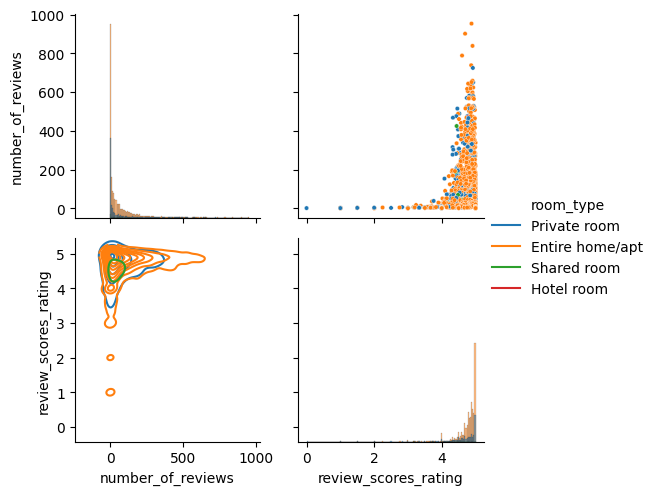

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.PairGrid(df, vars=['number_of_reviews', 'review_scores_rating'], hue='room_type')

g.map_upper(sns.scatterplot, s=10)

# Diagonal could be a histogram or kde
g.map_diag(sns.histplot, kde_kws={'bw_adjust': 2})

# Lower is a kde plot
g.map_lower(sns.kdeplot, cmap="Blues_d")
# Show the plot

g.add_legend()
plt.show()

<ipython-input-66-08ad0f8e8794>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_listings', y='host_name', data=top_ten_hosts, palette='Blues_d')


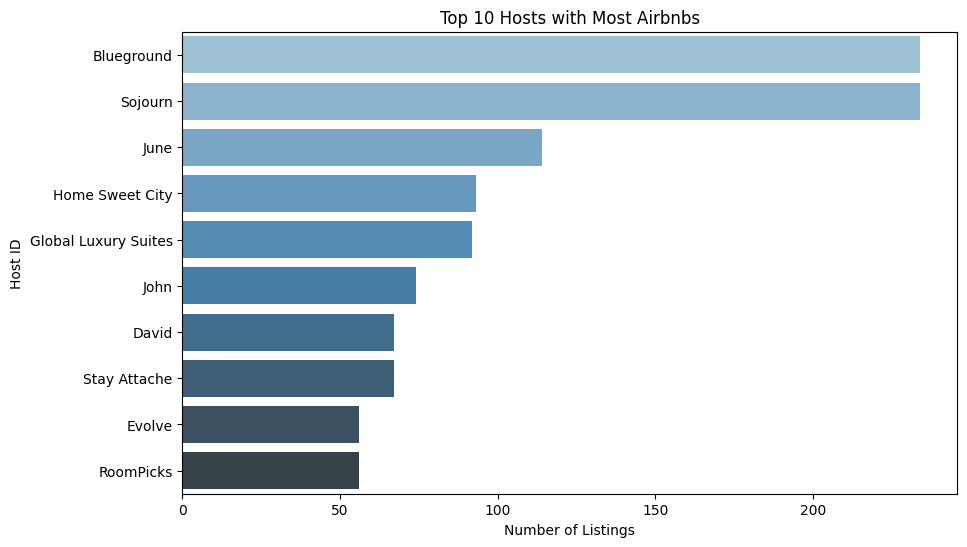

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

host_counts = df.groupby('host_name').size().reset_index(name='number_of_listings')

# Sort the counts and get the top ten hosts
top_ten_hosts = host_counts.nlargest(10, 'number_of_listings')

# Create the bar plot for the top ten hosts
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_listings', y='host_name', data=top_ten_hosts, palette='Blues_d')
plt.title('Top 10 Hosts with Most Airbnbs')
plt.xlabel('Number of Listings')
plt.ylabel('Host ID')
plt.show()